<a href="https://colab.research.google.com/github/chakrabortyrajatsubhra/ConvNeXt/blob/main/tsne_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np



# File paths for the three datasets
file_paths = [
    '/content/text_features_k110.pkl',
    '/content/text_features_ntu.pkl',
    '/content/text_features_sh.pkl'
]

# Labels for each dataset (for visualization)
dataset_labels = ['Dataset 1', 'Dataset 2', 'Dataset 3']

# Initialize list to hold all features and labels
all_features = []
all_labels = []

# Process each dataset
for i, file_path in enumerate(file_paths):
    with open(file_path, 'rb') as file:
        data = pickle.load(file)

    # Assuming each dataset follows a similar structure
    for feats in data.values():
        all_features.extend(feats)
        # Assign a unique label for the entire dataset
        all_labels.extend([dataset_labels[i]] * len(feats))

# Convert lists to numpy arrays
all_features = np.array(all_features)
all_labels = np.array(all_labels)

# Show the shape of the combined arrays to confirm successful creation
all_features.shape, all_labels.shape


((101888,), (101888,))

In [ ]:
# Initialize t-SNE with 2 components (2D)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
learning_rate = 200
tsne = TSNE(n_components=2, random_state=50, perplexity=50, n_iter=7000,learning_rate=learning_rate )

# Fit and transform the features to 2D
combined_features_2d = tsne.fit_transform(all_features)

# Plotting
plt.figure(figsize=(12, 10))
sns.scatterplot(x=combined_features_2d[:, 0], y=combined_features_2d[:, 1], hue=all_labels, palette="deep", legend='full')
plt.title('t-SNE Visualization of Combined Datasets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.3149414   0.26513672 -0.11065674 ... -0.1394043  -0.13513184
  0.3293457 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Assuming combined_features_2d and all_labels are available

# Convert the combined_features_2d and all_labels into a DataFrame for easier manipulation
df = pd.DataFrame(combined_features_2d, columns=['x', 'y'])
df['label'] = all_labels

# Calculate centroids for each dataset
centroids = df.groupby('label').mean()

# Function to calculate distances between centroids of selected datasets
def calculate_centroid_distances(centroids, labels):
    distances = {}
    for i, label1 in enumerate(labels):
        for j, label2 in enumerate(labels):
            if i < j:  # To avoid duplicate pairs and self-comparison
                key = f"{label1} to {label2}"
                # Calculate Euclidean distance between centroids
                distance = np.linalg.norm(centroids.loc[label1] - centroids.loc[label2])
                distances[key] = distance
    return distances

# Specify the labels of the datasets you want to compare
labels_to_compare = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

# Calculate distances
distances = calculate_centroid_distances(centroids, labels_to_compare)

# Print distances
for pair, distance in distances.items():
    print(f"Distance from {pair}: {distance:.2f}")


Distance from Dataset 1 to Dataset 2: 130.20
Distance from Dataset 1 to Dataset 3: 326.29
Distance from Dataset 1 to Dataset 4: 189.29
Distance from Dataset 2 to Dataset 3: 238.55
Distance from Dataset 2 to Dataset 4: 318.87
Distance from Dataset 3 to Dataset 4: 478.01


In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Assuming combined_features_2d and all_labels are available

# Convert the combined_features_2d and all_labels into a DataFrame for easier manipulation
df = pd.DataFrame(combined_features_2d, columns=['x', 'y'])
df['label'] = all_labels

# Calculate centroids for each dataset
centroids = df.groupby('label').mean()

# Function to calculate distances between centroids of selected datasets
def calculate_centroid_distances(centroids, dataset_labels):
    distances = {}
    for i, label1 in enumerate(dataset_labels):
        for j, label2 in enumerate(dataset_labels):
            if i < j:  # To avoid duplicate pairs and self-comparison
                key = f"{label1} to {label2}"
                # Calculate Euclidean distance between centroids
                distance = np.linalg.norm(centroids.loc[label1] - centroids.loc[label2])
                distances[key] = distance
    return distances

# Map generic labels to specific dataset names
dataset_names = {
    'Dataset 1': 'k110',
    'Dataset 2': 'ntu',
    'Dataset 3': 'sh_ntu',
    'Dataset 4': 'sh_k110'
}

# Apply mapping to labels in the DataFrame
df['label'] = df['label'].map(dataset_names)

# Recalculate centroids with specific dataset names
centroids = df.groupby('label').mean()

# Specify the dataset names directly
dataset_labels = ['k110', 'ntu', 'sh_ntu', 'sh_k110']

# Calculate distances
distances = calculate_centroid_distances(centroids, dataset_labels)

# Print distances
for pair, distance in distances.items():
    print(f"Distance from {pair}: {distance:.2f}")


Distance from k110 to ntu: 130.20
Distance from k110 to sh_ntu: 326.29
Distance from k110 to sh_k110: 189.29
Distance from ntu to sh_ntu: 238.55
Distance from ntu to sh_k110: 318.87
Distance from sh_ntu to sh_k110: 478.01


<ipython-input-27-f86f0ed06904>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Distance', y='Pair', data=distances_df, palette='viridis')


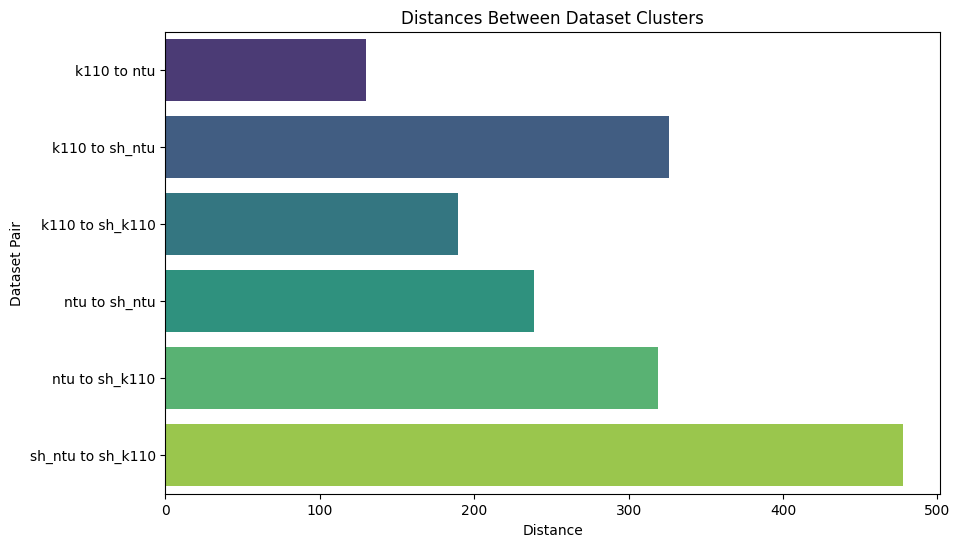

In [ ]:

# Assuming distances is a dictionary with keys as 'dataset1 to dataset2' and values as the calculated distances

# Convert the distances dictionary into a DataFrame for easier plotting
distances_df = pd.DataFrame(list(distances.items()), columns=['Pair', 'Distance'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Distance', y='Pair', data=distances_df, palette='viridis')

plt.title('Distances Between Dataset Clusters')
plt.xlabel('Distance')
plt.ylabel('Dataset Pair')

plt.show()


<ipython-input-28-28d7b53ca567>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], ax=axs[0, i], shade=True)
<ipython-input-28-28d7b53ca567>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 2'], ax=axs[1, i], shade=True)
<ipython-input-28-28d7b53ca567>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], ax=axs[0, i], shade=True)
<ipython-input-28-28d7b53ca567>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an

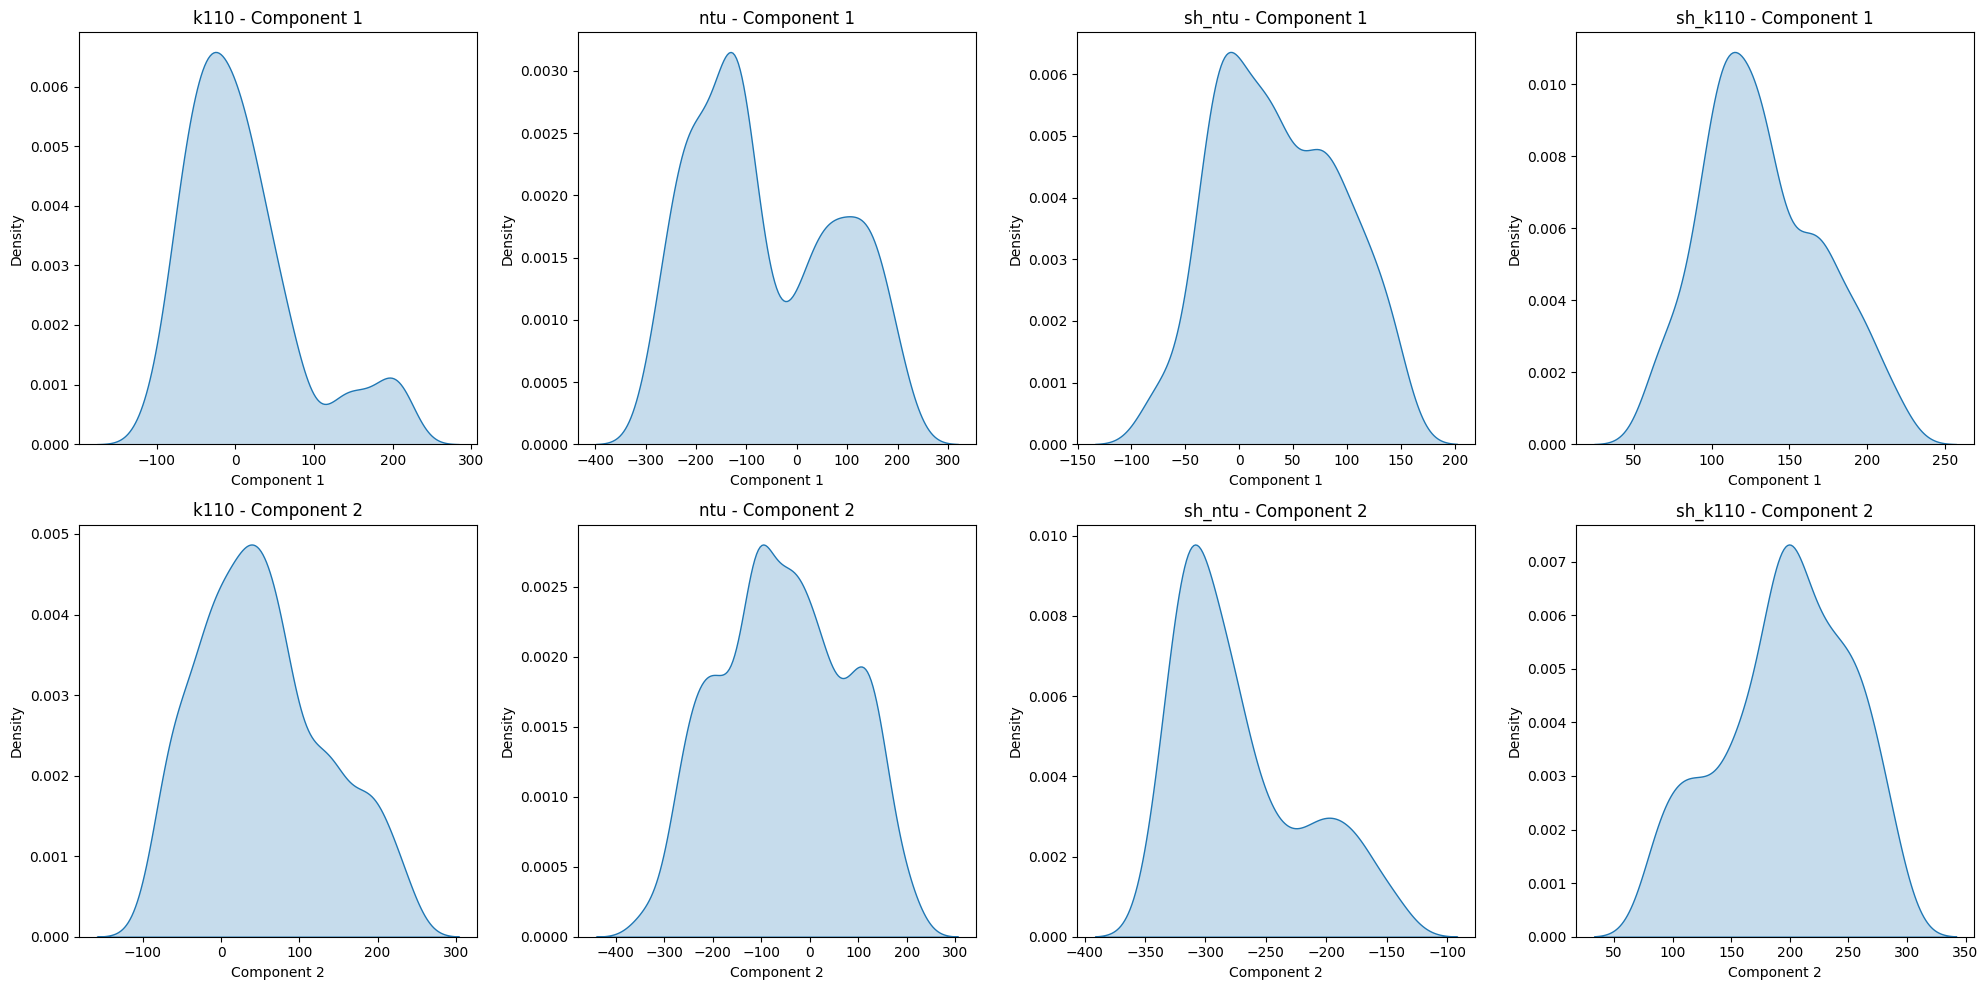

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_features_2d and all_labels are available and populated
# Let's first create a DataFrame from your t-SNE results and labels
df_tsne = pd.DataFrame(combined_features_2d, columns=['Component 1', 'Component 2'])
df_tsne['Dataset'] = all_labels

# Update your dataset names according to your latest instructions
dataset_names = ['k110', 'ntu', 'sh_ntu', 'sh_k110']
df_tsne['Dataset'] = df_tsne['Dataset'].map({
    'Dataset 1': 'k110',
    'Dataset 2': 'ntu',
    'Dataset 3': 'sh_ntu',
    'Dataset 4': 'sh_k110'
})

# Plotting the distributions of the t-SNE components for each dataset
fig, axs = plt.subplots(2, len(dataset_names), figsize=(20, 10))

for i, dataset in enumerate(dataset_names):
    # KDE plot for Component 1
    sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], ax=axs[0, i], shade=True)
    axs[0, i].set_title(f'{dataset} - Component 1')

    # KDE plot for Component 2
    sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 2'], ax=axs[1, i], shade=True)
    axs[1, i].set_title(f'{dataset} - Component 2')

for ax in axs.flat:
    ax.set(ylabel='Density')

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-30-45c362e5a091>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], label=dataset, shade=True)
<ipython-input-30-45c362e5a091>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], label=dataset, shade=True)
<ipython-input-30-45c362e5a091>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], label=dataset, shade=True)
<ipython-input-30-45c362e5a091>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

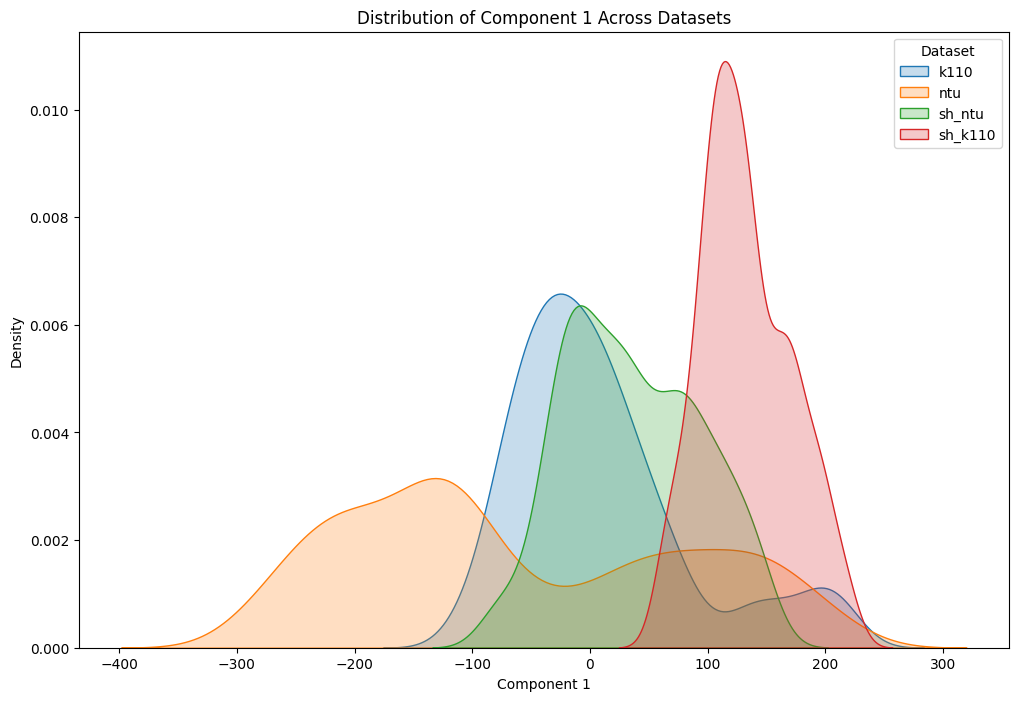

<ipython-input-30-45c362e5a091>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 2'], label=dataset, shade=True)
<ipython-input-30-45c362e5a091>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 2'], label=dataset, shade=True)
<ipython-input-30-45c362e5a091>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 2'], label=dataset, shade=True)
<ipython-input-30-45c362e5a091>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become

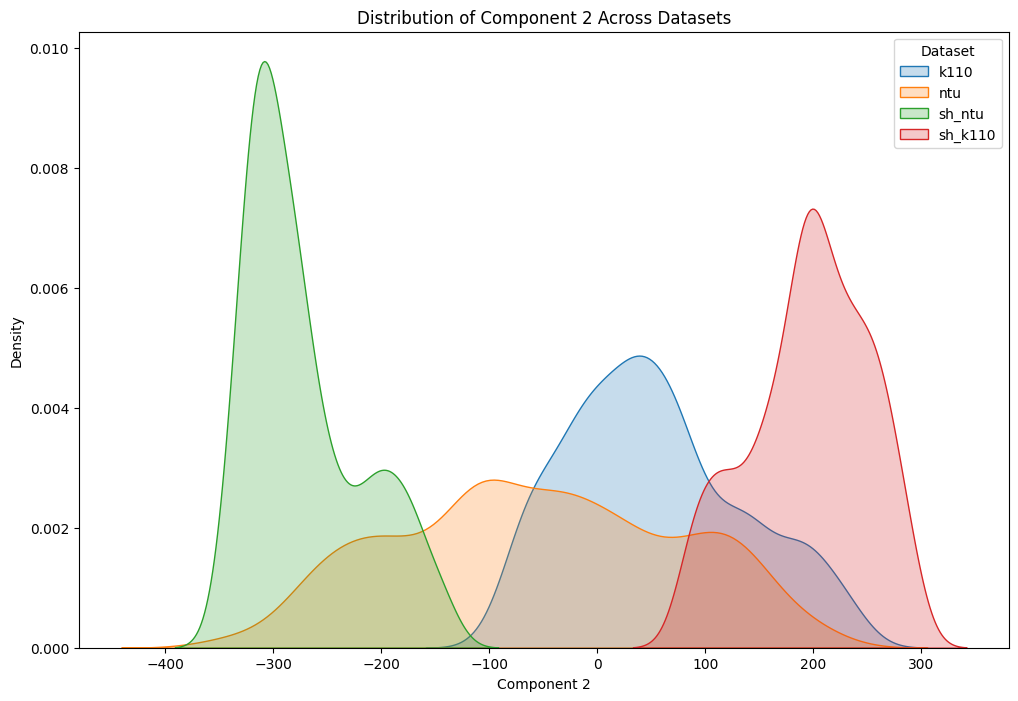

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming combined_features_2d and all_labels are available and populated
# Let's first create a DataFrame from your t-SNE results and labels
df_tsne = pd.DataFrame(combined_features_2d, columns=['Component 1', 'Component 2'])
df_tsne['Dataset'] = all_labels

# Update your dataset names according to your latest instructions
dataset_names = ['k110', 'ntu', 'sh_ntu', 'sh_k110']
df_tsne['Dataset'] = df_tsne['Dataset'].map({
    'Dataset 1': 'k110',
    'Dataset 2': 'ntu',
    'Dataset 3': 'sh_ntu',
    'Dataset 4': 'sh_k110'
})

# Plotting the KDEs of Component 1 for each dataset on the same axes
plt.figure(figsize=(12, 8))
for dataset in dataset_names:
    sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 1'], label=dataset, shade=True)

plt.title('Distribution of Component 1 Across Datasets')
plt.xlabel('Component 1')
plt.ylabel('Density')
plt.legend(title='Dataset')
plt.show()

plt.figure(figsize=(12, 8))
for dataset in dataset_names:
    sns.kdeplot(df_tsne[df_tsne['Dataset'] == dataset]['Component 2'], label=dataset, shade=True)

plt.title('Distribution of Component 2 Across Datasets')
plt.xlabel('Component 2')
plt.ylabel('Density')
plt.legend(title='Dataset')
plt.show()


In [ ]:
import numpy as np
from scipy.stats import gaussian_kde
from scipy.spatial.distance import jensenshannon

def estimate_pdf(values, bins):
    """Estimate the PDF using KDE and discretize it over specified bins."""
    kde = gaussian_kde(values)
    pdf_values = kde.evaluate(bins)
    pdf_values /= pdf_values.sum()  # Normalize to make it a proper probability distribution
    return pdf_values

# Assume df_tsne is your DataFrame containing t-SNE components and dataset labels
component = 'Component 2'  # Example component

# Select your two datasets
values1 = df_tsne[df_tsne['Dataset'] == 'sh_k110'][component]
values2 = df_tsne[df_tsne['Dataset'] == 'k110'][component]

# Define the range and bins for discretization
min_bin = min(values1.min(), values2.min())
max_bin = max(values1.max(), values2.max())
bins = np.linspace(min_bin, max_bin, 100)  # Adjust the number of bins as necessary

# Estimate and discretize the PDFs
pdf1 = estimate_pdf(values1, bins)
pdf2 = estimate_pdf(values2, bins)

# Calculate the JS Divergence
js_divergence = jensenshannon(pdf1, pdf2)

print(f"JS Divergence: {js_divergence}")


JS Divergence: 0.5770504174741636
